In [1]:

import pandas as pd

df = pd.read_csv('Marketing_Campaign_Dataset.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nShape of the dataset (rows, columns):", df.shape)

print("\nDataset info:")
print(df.info())

print("\nDescriptive statistics for numerical features:")
print(df.describe())


First 5 rows of the dataset:
   ID  Year_Birth   Education Marital_Status     Income  Kidhome  Teenhome  \
0   1        1978      Master         Single  491796.22        1         0   
1   2        1974      Master        Married  513926.78        1         0   
2   3        1972  Graduation          Alone  521309.22        2         2   
3   4        1911         PhD           YOLO  231628.91        1         0   
4   5        1931    2n Cycle       Divorced  223936.10        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2013-12-26       31      1364  ...                 14             1   
1  2014-05-04       23      1275  ...                  5             1   
2  2013-02-15       93        62  ...                  1             1   
3  2013-06-12       13       251  ...                 14             0   
4  2013-05-30       65       670  ...                 13             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2

In [2]:

from sklearn.preprocessing import LabelEncoder, StandardScaler


print("Missing values per column:\n", df.isnull().sum())

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# For categorical columns: fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("\nMissing values after handling:\n", df.isnull().sum())

# -----------------------------------------
# Step 3: Encode Categorical Variables
# -----------------------------------------
# Using Label Encoding for simplicity (suitable for non-ordinal categories)
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nSample data after encoding categorical variables:")
print(df.head())

# -----------------------------------------
# Step 4: Normalize Numerical Features
# -----------------------------------------
# Normalize all numerical columns except ID (since it's an identifier)
features_to_normalize = [col for col in numerical_cols if col != 'ID']

scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

print("\nSample data after normalization:")
print(df.head())


Missing values per column:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Missing values after handling:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
R

In [3]:
# Feature Engineering

import datetime


spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

#  Total_Children: Sum of Kidhome and Teenhome
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

#  Customer_Seniority: Days since becoming a customer
reference_date = datetime.datetime(2015, 1, 1)  # Assuming data collected up to Jan 1, 2015
df['Customer_Seniority'] = (reference_date - pd.to_datetime(df['Dt_Customer'], unit='D')).dt.days


columns_to_drop = ['ID', 'Dt_Customer']
df = df.drop(columns=columns_to_drop)

print("Sample data after feature engineering:")
print(df.head())


Sample data after feature engineering:
   Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0    1.139556          3               4  0.825242 -0.002255 -1.224159   
1    1.004937          3               3  0.940592 -0.002255 -1.224159   
2    0.937628          2               1  0.979071  1.220315  1.224794   
3   -1.115306          4               7 -0.530807 -0.002255 -1.224159   
4   -0.442213          0               2 -0.570904 -0.002255  0.000317   

    Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp5  \
0 -0.630983  1.430667  -0.471812         0.535116  ...     -1.001747   
1 -0.911377  1.224478  -0.088556        -0.815740  ...     -1.001747   
2  1.542065 -1.585719   0.486327        -0.665422  ...     -1.001747   
3 -1.261868 -1.147857  -0.210501         0.583218  ...      0.998256   
4  0.560688 -0.177145  -1.551895        -0.424913  ...     -1.001747   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0   


First 5 rows of PCA results:
         PCA1      PCA2
0 -156.719033 -0.252333
1 -254.719115 -0.046071
2  140.280860  1.262186
3   30.280756  1.302277
4   43.281226 -2.754306


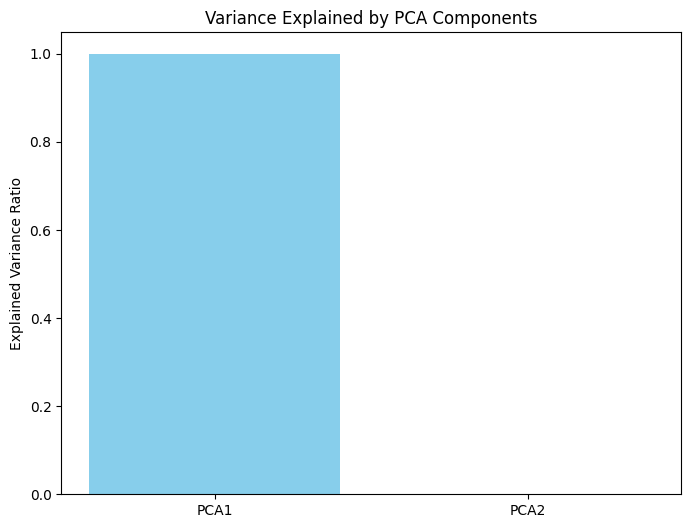

In [4]:
# Step 1: Import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 2: Initialize PCA
# Let's start by reducing to 2 components for visualization
pca = PCA(n_components=2)

# Step 3: Fit PCA on the preprocessed DataFrame
pca_result = pca.fit_transform(df)

# Step 4: Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Display the first 5 rows of PCA results
print("\nFirst 5 rows of PCA results:")
print(pca_df.head())

# Step 5: Visualize the explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(['PCA1', 'PCA2'], explained_variance, color='skyblue')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by PCA Components')
plt.show()


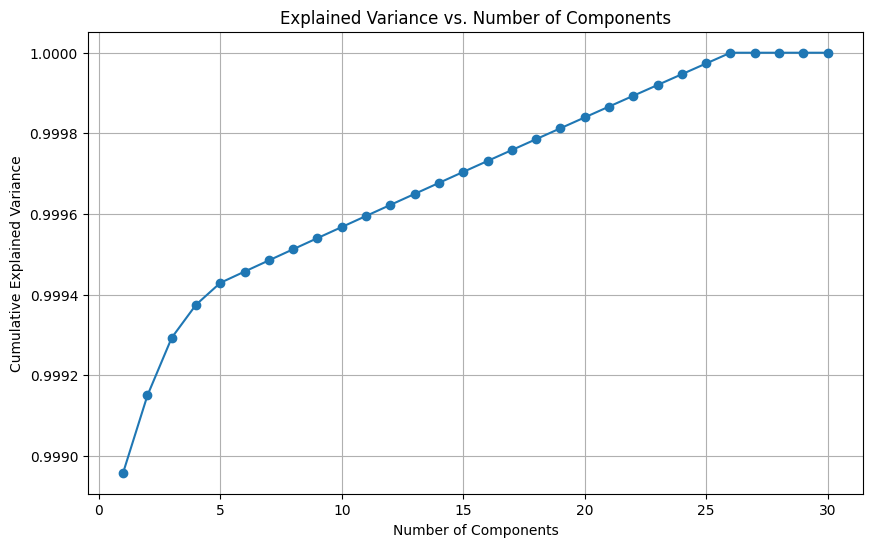

In [5]:

pca_full = PCA().fit(df)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df.columns)+1), pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


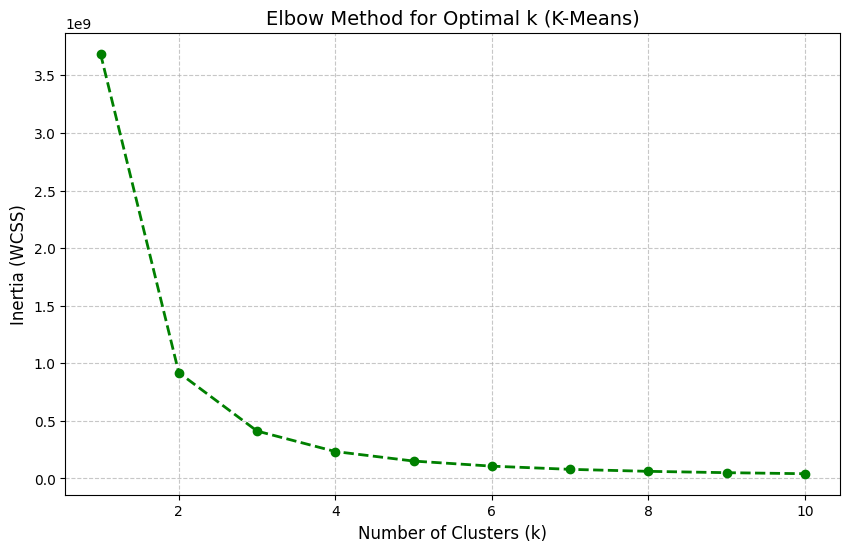

In [6]:
# Import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of cluster numbers to try
cluster_range = range(1, 11)

# Store inertia (within-cluster sum of squares) for each k
inertia_values = []

# Calculate K-Means for different cluster counts
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(
    cluster_range, inertia_values,
    marker='o', linestyle='--', color='green', linewidth=2, markersize=6
)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal k (K-Means)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


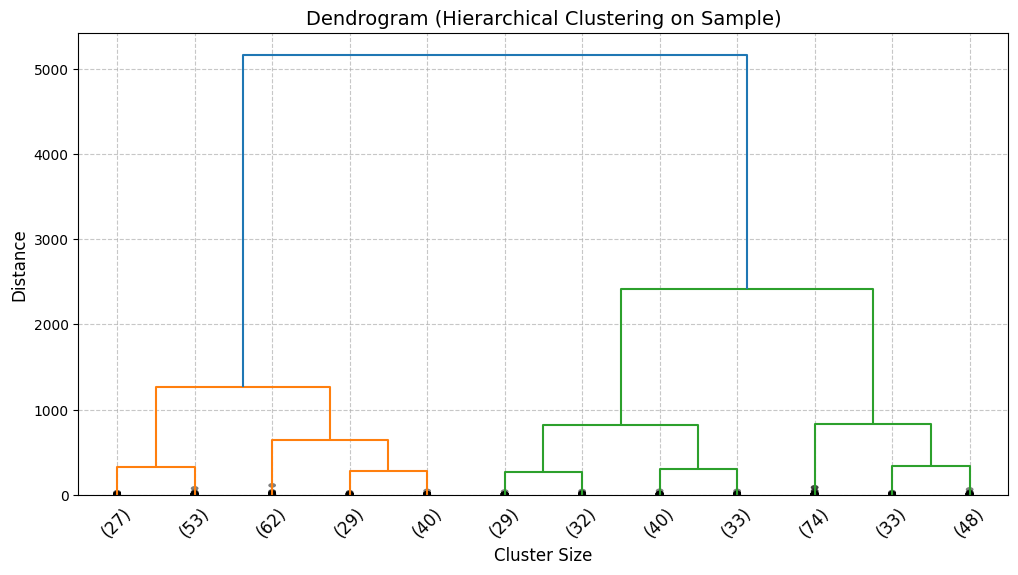

In [8]:

from scipy.cluster.hierarchy import linkage, dendrogram

df_sample = df.sample(n=500, random_state=42)

# Compute linkage matrix on the sample
linked = linkage(df_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=12, show_contracted=True)
plt.title('Dendrogram (Hierarchical Clustering on Sample)', fontsize=14)
plt.xlabel('Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


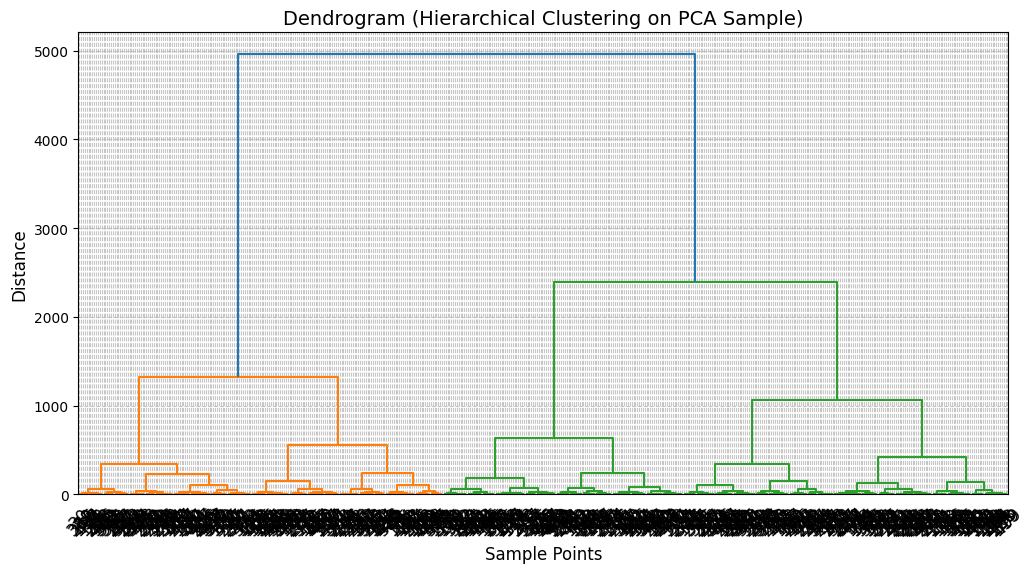

In [9]:
# Reduce dimensions to 2 for dendrogram visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Use a sample of the PCA-reduced data
df_pca_sample = df_pca[:500]

# Perform linkage
linked = linkage(df_pca_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, leaf_rotation=45, leaf_font_size=12)
plt.title('Dendrogram (Hierarchical Clustering on PCA Sample)', fontsize=14)
plt.xlabel('Sample Points', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


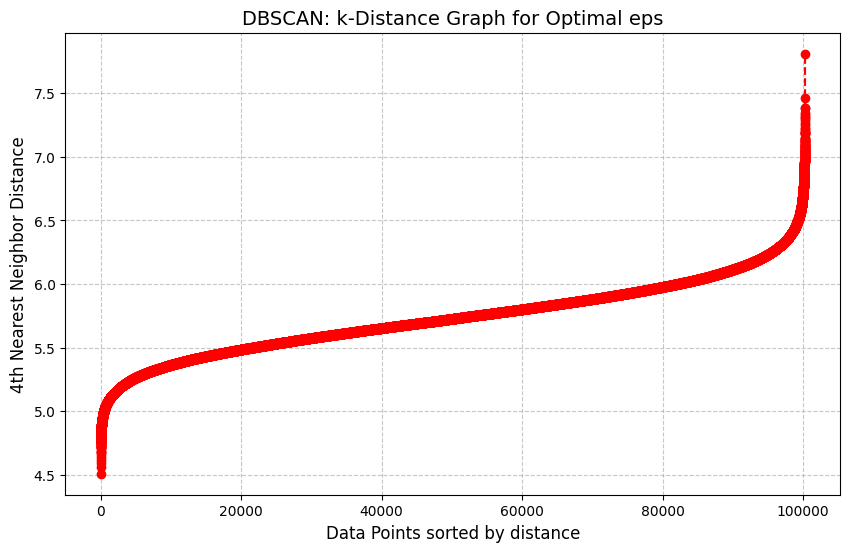

DBSCAN Cluster Distribution:
Cluster -1: 100279 points


In [10]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Find the optimal epsilon (eps) using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
sorted_distances = np.sort(distances[:, 4])  # 4th neighbor distance

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances, marker='o', linestyle='--', color='red', markersize=6)
plt.xlabel('Data Points sorted by distance', fontsize=12)
plt.ylabel('4th Nearest Neighbor Distance', fontsize=12)
plt.title('DBSCAN: k-Distance Graph for Optimal eps', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Apply DBSCAN after selecting eps from the plot (e.g., eps=0.5, min_samples=5)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)

# Check cluster labels distribution
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
print("DBSCAN Cluster Distribution:")
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} points")


In [11]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for K-Means
best_k = 3  # Replace with the optimal number of clusters if determined
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df)
kmeans_silhouette = silhouette_score(df, kmeans_labels)
print(f'Silhouette Score for K-Means (k={best_k}): {kmeans_silhouette:.4f}')

# Compute silhouette score for DBSCAN
if len(set(dbscan_labels)) > 1:  # Silhouette score is not defined for a single cluster
    dbscan_silhouette = silhouette_score(df, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {dbscan_silhouette:.4f}')
else:
    print("DBSCAN resulted in a single cluster, silhouette score is not defined.")


Silhouette Score for K-Means (k=3): 0.5852
DBSCAN resulted in a single cluster, silhouette score is not defined.
